<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/ProbabilityAndStatisticsForDatascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IITM and TalentSprint
### Assignment 4: Probability and Statistics for Data Science

## Learning Objectives

At the end of the experiment, you will be able to

* know a general idea on how probability plays an important role in data science.
* understand sampling distributions, sampling mean and standard-deviaton. Central limits theorem.
* use hypothesis testing: T Test, Z Test,  Chi-Square Test 
* understand how confidence intervals are used.
* know more about correlation functions.
* use parameter estimation using MLE and Bayesian methods.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_Assignment_04_ProbabilityAndStatisticsForDatascience_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch") 
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://adsmi.iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Please complete Id and Password cells before running setup


#### Importing necessary packages for this assignment.
Lets first import the necessary packages required for this notebook.

In [4]:
# Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from statsmodels.stats import weightstats as stests # Necessary for z-test
import seaborn as sns # Required for some of the plotting tasks.

# Packages necessary for bayesian inference
from sklearn.linear_model import BayesianRidge

### Importance of Probability and Statistics in Data Science

Making estimates and predictions from a large corpus of real world data is often the primary challenge a data scientist faces. Estimates can be made using statistical methods which are heavily dependent of probability theory. Thus, probability and statistics are key tools that are present at the disposal of a data scientist. Let us now understand the concept of data and how it relates to probability and statistics.



### What is data?

Data is the information that is collected through observations. The data can be a collection of facts (numbers, words, measurements, observations, etc) that has been translated into a form that computers can process. Data provides us with various types of information like - 
1. If two variables are inter-related?
2. Helps in forecasting different outcomes based on given prior.
3. Helps in determining various patterns present in large amounts of data. Such patterns can also be utilized to detect anomoulous occurances. 

Large amounts of data are often represented as a distribution with different properties like mean, varience, etc. Such distributions are called sampling distributions.

### Sampling Distributions

A statistic, such as the sample mean or the sample standard deviation, is a number computed from large amounts of given data which is often thought to be a "sample". Since a sample is random, every statistic is a random variable: it varies from sample to sample in a way that cannot be predicted with certainty. As a random variable it has a mean, a standard deviation, and a probability distribution. The probability distribution of a statistic is called its sampling distribution. 

#### Sample Mean and Sample Variance.

Lets say that we wish to estimate $\mu$ of a population. We will take random $n$ instances from the population and call it a sample. We will take multiple such samples, each of size $n$ and compute the mean $\overline{x}$ of each one. Therefore, we will have $n$ means. The sample mean $\overline{x}$ is a random variable: it varies from sample to sample in a way that cannot be predicted with certainty. We will denote this random variable as $\overline{X}$. Please note that $\overline{X}$ is the random variable representing sample mean (each sample is a collection of $n$ instances selected randomly). The random variable $\overline{X}$ will have a mean $\mu_\overline{X}$ and standard deviation $\sigma_\overline{X}$. 

<br>

#### Example
Q1. A  beach volleyball team consists of three players who weigh 100, 150, 200 pounds. Find all possible random samples without replacement of size two and compute the sample mean for each one. Use them to find the probability distribution, the mean, and the standard deviation of the sample mean $\overline{X}$.

Ans - Let us find all the pairs of players (each sample). $(100, 150), (100, 200), (150, 100), (150, 200), (200, 100), (200, 150)$. Here the sample size $n=2$. The means of each of these samples (denoted by $\overline{x}$) are $125, 150, 125, 175, 150, 175$. Therefore, the random variable $\overline{X}$ can take $125, 150, 175$ as values. Now each of values are equally likely, therefore $p(\overline{X} = 125) = p(\overline{X} = 150) = p(\overline{X} = 175) = \frac{1}{3}$. The mean of a discrete random variable is given by,

$\mu_{\overline{X}=\overline{x}} = \Sigma \overline{x}p(\overline{x})$

Therefore in our case, $\mu_\overline{X} = \frac{1}{3}.100 + \frac{1}{3}.150 + \frac{1}{3}.200 = 150$

Let us now find the variance of $\overline{X}$, i.e. $\sigma_\overline{X}^2$.

$\sigma_\overline{X}^2 = \Sigma_\overline{x} (\overline{x} - \mu_\overline{X})^2 . p(\overline{x}) = (100-150)^2.\frac{1}{3} + (150-150)^2.\frac{1}{3} + (200-150)^2.\frac{1}{3} = \frac{5000}{3} = 1666.6667$

Therefore, $\sigma_\overline{X} = 40.824$

Now let us check the $\mu$ and $\sigma$ of the total population. 

$\mu = \frac{(100 + 150 + 200)}{3} = 150 = \mu_{\overline{X}}$. Therefore, mean of the total population is equal to the mean of the Sample Mean!

Similarly, standard deviation $\sigma$ of the total population = $50$
If we look closely then, $50/\sqrt{2} \approx 40.824 $. Therefore, $\sigma_\overline{X} = \frac{\sigma}{\sqrt{n}}$. Here $n$ is the size of each sample!

To summarize, we can estimate the mean of a total population by finding the mean of sample mean (mean of multiple samples randomly sampled from the population) and also estimate the standard deviation of the population by finding the standard deviation of the sample mean.

$\mu = \mu_{\overline{X}}$, $\sigma_\overline{X} = \frac{\sigma}{\sqrt{n}}$, where $n$ is the number of instances present in each sample. **These two properties are extremely important as it effectively allows us not to estimate the mean and standard-deviation of a population by using randomly sampled instances.** While, knowing $\mu$ and $\sigma$ of a population is highly benificial, estimating the shape of the distribution is also important. One of the most used distribution is the Gaussian or the normal distribution. We now look at a central limit theorem that helps us map $\mu_\overline{X}$ and $\sigma_\overline{X}$ to a normal distribution.

#### The central limit theorem.

According to this theorem, for samples of size 30, i.e., $(n > 30)$ or more, the sample mean is approximately normally distributed, with mean $\mu_\overline{X} =\mu$ and standard deviation $\sigma_\overline{X} = \frac{\sigma}{\sqrt{n}}$, where $n$ is the sample size. The larger the sample size, the better the approximation.

Let us check this theorem using a simply python code to plot the means of random sample (varying $n$ for each sample). We will select the random numbers between $-100$ and $100$. We will use $n=\{1, 10, 30, 60, 100, 150\}$. For each $n$ we will choose $1000$ samples from the same population (between $-100$ and $100$ denotes the population). 


For more information about [central limit theorem](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html)

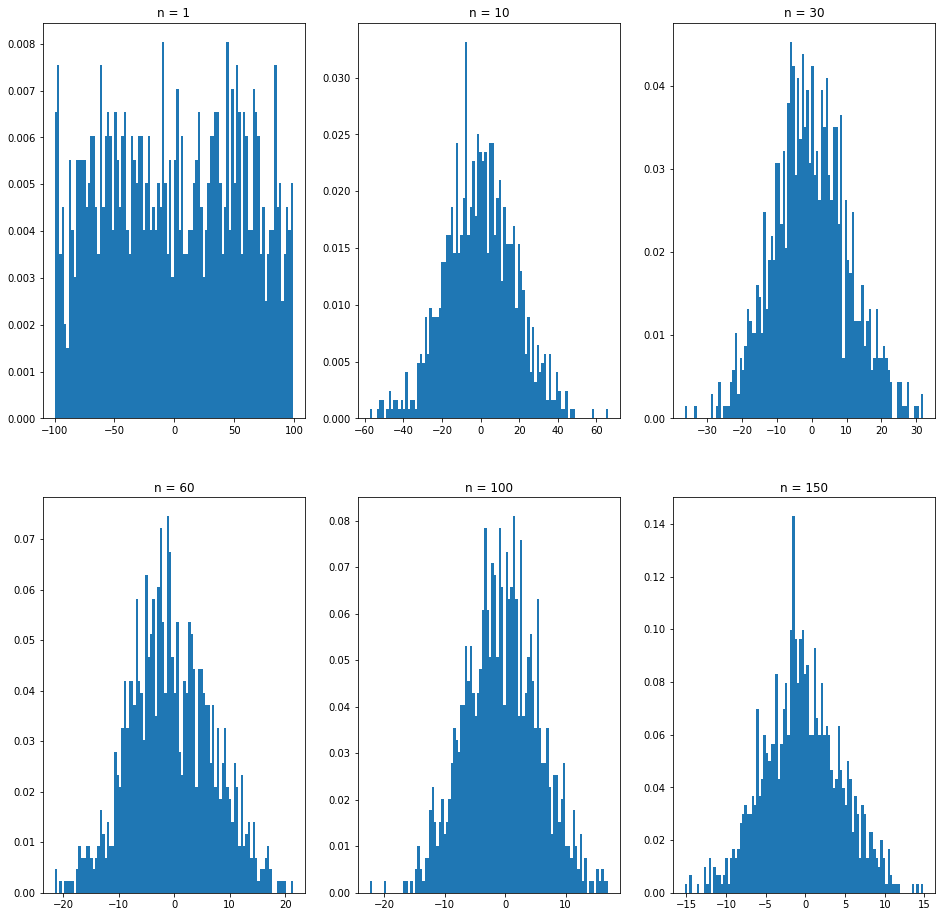

In [5]:
# number of instances in a sample (n)
num = [1, 10, 30, 60, 100, 150] 

# list of sample means
means = [] 

# Generating 1, 10, 30, 60, 100, 150 random numbers from -100 to 100 in each sample
# We will generate 1000 such sample for each n between -100 to 100 (population). Each sample will have 1 or 10 or 30 or 60 or 100 or 150 numbers.
# taking their mean and appending it to list means.
for j in num:
    x = [np.mean(np.random.randint(-100, 100, j)) for _i in range(1000)]
    means.append(x)

k = 0
 
# plotting all the means in one figure
fig, ax = plt.subplots(2, 3, figsize =(16, 16))
for i in range(0, 2):
  for j in range(0, 3):
    # Histogram for each x stored in means
    ax[i, j].hist(means[k], 100, density = True)
    ax[i, j].set_title(label = f"n = {num[k]}")
    k = k + 1
plt.show()

As we can see, for the approximation towards a normal distribution improves with improving sample size $n$. 

We now check how estimating population parameters can help in the process of hypothesis testing.

### Hypothesis Testing

A hypothesis is based on available information and the investigator's belief about the population parameters. The process of hypothesis testing involves setting up two competing hypotheses, the null hypothesis and the alternate hypothesis. One selects a random sample (or multiple samples when there are more comparison groups), computes summary statistics and then assesses the likelihood that the sample data support the research or alternative hypothesis. In other words, a hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data. It helps us claim a finding to be statistically significant (can often be useful while claiming validity of experimental results). Let us now see four most widely used hypothesis testing methods. 

#### P-Value

The P value, or calculated probability, is the probability of finding the observed. A p value is used in hypothesis testing to help you support or reject the null hypothesis. The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis (accept the research hypothesis). Generally p-value $<$ than $0.05$ is considered to be enough to reject the null hypothesis.


![img](https://cdn.extras.talentsprint.com/ADSMI/Images/pvalue.png)


The P-value will be extensively used by the following tests reported below.

#### T-Test
A t-test is a type of test to check if there is a significant difference between the means of two groups that may be related in certain features. It is generally used when the data sets, like the set of data recorded as outcome from flipping a coin a 100 times, would follow a normal distribution and may have unknown variances. 



**One sample student T-test:**
One Sample t-test (single sample t-test) is used to compare the sample mean (a random sample from a population) with the specific value (hypothesized or known mean of the population). In the following example, we check a set of ages $\{ 10,20,35,50,28,40,55,18,16,55,30,25,65,18,43,23,21,20,19,70\}$. We assume the null hypothesis to be mean of the ages $= 50$. The original mean is 33.05. Therefore, the null hypothesis should ideally be rejected. Lets check by using a python code with ``scipy.stats.ttest_1samp``.



In [6]:
# Define a sample data of ages.
ages=[10,20,35,50,28,40,55,18,16,55,30,25,65,18,43,23,21,20,19,70]

ages_mean = np.mean(ages)

print("Mean of ages: ", ages_mean)

# Lets hypothize is the average age of a person is 50 in the given population.
# We already know that this is not true. The mean age is around 33. Therefore, p-value should be less than 0.05
null_hypothesis = 50 

tset, pval = scipy.stats.ttest_1samp(ages, null_hypothesis)
print("P-value: ", pval)

if pval < 0.05:    # If p-value is less than 0.05 we will reject the null hypothesis
    print("We are rejecting null hypothesis i.e,average age is not "+str(null_hypothesis))
else:
    print("We are accepting null hypothesis i.e,average age is "+str(null_hypothesis))

Mean of ages:  33.05
P-value:  0.0004001394092999349
We are rejecting null hypothesis i.e,average age is not 50


In the above code, please change the null hypothesis age to $33.05$ and check the result!

**Two sample student T-test:**
The independent samples T-test or 2-sample T-test compares the means of two independent groups in order to determine whether there is statistical evidence that the population means are significantly different or same for both sets of data. In simpler terms, whether both the data is from the same population or different? 

In [7]:
# We will first create two dummy data. 
# data1 are all even
# data2 is data1 plus epsilon (ideally these should be from the same distributions)
print ("CASE 1")
data1 = [2, 4, 6, 8, 10, 12, 14, 16, 18]
data2 = [2.0001, 4.0002, 6.00001, 8.00001, 10.0001, 12.00001, 14.09001, 16.0001, 18.0001]

print ("Data 1: ", data1)
print ("Data 2: ", data2)
stat, p = scipy.stats.ttest_ind(data1, data2)
print('P Value is :',p)
if p > 0.05:
    print('Both the datas are from the same distribution')
else:
    print('Both the datas are from different distributions')

# Let us now check another case. In this, we make data2 to be very small 
print ("---------------------------------------")
print ("CASE 2")
data1 = [2, 4, 6, 8, 10, 12, 14, 16, 18]
data2 = [ 0.0001, 0.0000002, 0.000005, 0.0002, 0.0009, 0.000005, 0.00003, 0.000001]

print ("Data 1: ", data1)
print ("Data 2: ", data2)
stat, p = scipy.stats.ttest_ind(data1, data2)
print('P Value is :',p)
if p > 0.05:
    print('Both the datas are from the same distribution')
else:
    print('Both the datas are from different distributions')

CASE 1
Data 1:  [2, 4, 6, 8, 10, 12, 14, 16, 18]
Data 2:  [2.0001, 4.0002, 6.00001, 8.00001, 10.0001, 12.00001, 14.09001, 16.0001, 18.0001]
P Value is : 0.9969383730357111
Both the datas are from the same distribution
---------------------------------------
CASE 2
Data 1:  [2, 4, 6, 8, 10, 12, 14, 16, 18]
Data 2:  [0.0001, 2e-07, 5e-06, 0.0002, 0.0009, 5e-06, 3e-05, 1e-06]
P Value is : 0.00011975940529610735
Both the datas are from different distributions


#### Z-Test
While the T-test is designed for samples with lower sample size, Z-test is often used for larger sample sizes. This is because, Z-test considers the samples to be normally distributed according to the central limits theorem.

* A Z-test is a statistical test to determine whether two population means are different when the variances are known and the sample size is large.
* It can be used to test hypotheses in which the Z-test follows a normal distribution.

Similar to T-test, the Z-test can also be divided into two cases. 
The one-sample and a two-sample case. In one sample Z-test, we try to find whether the mean of a data group is the population mean or not.

In [8]:
# We take a population of a guassian distribution of mean 10.0 and standard dev 1.0

# Population mean
mean_population = 10.0

# Let us take a sample of 10000 points from the same distribution
# We need to check whether the mean of the sample and the mean of the population are close or not
# The null hypothesis is they are not close. 
# If the p-value is greater than 0.05 we can reject the null hypothesis.
# Please note that the parameter "value" takes in the mean of sample under null hypothesis. 
# This is significant because mean(null hypothesis) != mean(population). Therefore if p > 0.05 it rejects the null hypothesis. 
sample = np.random.normal(10.0, 1.0, 10000)
ztest, pval = stests.ztest(sample, value=mean_population)

print ("P-Value: ", pval)

if pval > 0.05:
  print ("Rejecting Null Hypothesis: The mean of sample and the mean of population are close. \nThe sample and the population can be thought to have similar characteristics!")
else:
  print ("The mean of population and the sample are very different! Null hypothesis wins!")

print ("------------------------------")
print ("Let us now check the means directly")
print ("Mean of population: ", mean_population)
print ("Mean of sample: ", np.mean(sample))
print ("If the means are close to each other the p-val is below 0.05 and vice versa.")

P-Value:  0.9063711533044122
Rejecting Null Hypothesis: The mean of sample and the mean of population are close. 
The sample and the population can be thought to have similar characteristics!
------------------------------
Let us now check the means directly
Mean of population:  10.0
Mean of sample:  9.998820847497049
If the means are close to each other the p-val is below 0.05 and vice versa.


Try out the same by changing the $\mu$ and $\sigma$ values of the sample distribution in the above code.

For 2-sample Z-test, we do a very similar experiment to the  2-sample T-test one. The main goal of this test is to check if given two samples from unknown populations, whether their sample means are equal or not. 

In [9]:
# Let us take different numbers of points (different sized samples) from the same population. We define the population as a normal distribution which mean = 0 and
# standard deviation = 1.
# Sample 1 will have a size of 10,000 and sample 2 will have a size of 1,000

sample1 = np.random.normal(0.0, 1.0, 10000)
sample2 = np.random.normal(0.0, 1.0, 1000)

# Null hypothesis is the samples are from different distribution. Thus the difference of means between the two distribution is not 0. 
# The parameter value expects the the difference between mean of x1 and mean of x2 under the Null hypothesis. This value cannot be 0 because null hypothesis states that
# the means are different. Therefore if we pass 0 here, then p < 0.05 will be accepting the null hypothesis and vice versa
ztest, pval = stests.ztest(sample1, sample2, value=0, alternative='two-sided')
print ("P-value: ", pval)

if pval > 0.05:
  print ("Rejecting null hypothesis: The two samples have the same sample mean!")
else:
  print ("Accepting null hypothesis: The two distributions have different sample means")

P-value:  0.42410451865341414
Rejecting null hypothesis: The two samples have the same sample mean!


Please change the distributions of the samples and check the effect!

#### Chi-Square Test

The test is applied when we have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

For example, in a survey amongs cricket players, players might be classified by their roles (batsman or bowler) and their average career span (5 years, 10 years, 15). We could use a chi-square test for independence to determine whether your playing position is related with how long you play. 

We provide a simple python code for the Chi-Square test.

In [10]:
# In the array players, we represent bowlers as 1 and batsman as 2
# In the array career, we denote the number of years they played cricket

# The null hypothesis is that they are independent. If p > alpha then we accept null hypothesis, else we reject it.
# Alpha is calculated as 1-p 
# Alpha can also be set to 0.05 like done in other examples 

players = np.array([2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2])
career = [10, 10, 5, 10, 5, 5, 15, 10, 5, 5, 10, 10]

table = [career, players]
stat, p, dof, expected = scipy.stats.chi2_contingency(table)

# In chi-square test, we find alpha = 1-p for checking the statistical significance.
p = 1-p
alpha = 1-p
print('P value:', p)
print ('Alpha value: ', alpha)
if alpha >= p:
    print('Rejecting null hypothesis:  playing career and the are dependent!')
else:
    print('Accepting null hypothesis: they are independent!')

P value: 4.250423091267663e-08
Alpha value:  0.9999999574957691
Rejecting null hypothesis:  playing career and the are dependent!


So far we have covered the concepts of sampling distributions as well as hypothesis testing. However, the sample mean and sample variance can never be fully estimated, thus the mean and varience of a complete population also remains uncertain. Thus, the concept of confidence intervals are introduced which bounds this uncertainity.

### Confidence Intervals

A confidence interval is a bound on the estimate of a population variable. It is an interval statistic used to quantify the uncertainty on an estimate. The confidence interval provides bounds on population parameters, such as a mean, standard deviation, etc. From a machine learning point of view, we use confidence intervals in the presentation of the skill of a predictive model.

For example, a confidence interval could be used in presenting the skill of a classification model, which could be stated as:

Given the sample, there is a 95% likelihood that the range x to y covers the true model accuracy.

#### Formula for finding confidence interval of a normally distributed data - 

$CI = \overline{X} \pm Z^* \frac{\sigma}{\sqrt{n}}$

Here,
* CI = the confidence interval
* $\overline{X}$ = the population mean
* $Z^*$ = the critical value of the z-distribution
* $\sigma$ = the population standard deviation
* $\sqrt{n}$ = the square root of the population size

Let us now check simple python codes which helps us in determining the confidence intervals of a given data.


 

In [11]:
#define sample data
# We take 50 random points between 10 and 30
data = np.random.randint(10, 30, 50)

#create 95% confidence interval for population mean
ci_l, ci_h = scipy.stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=scipy.stats.sem(data))

print ("Mean of the given data: ", np.mean(data))

print ("The 95% confidence interval for the true population mean is ({}, {}).".format(ci_l, ci_h))

#create 99% confidence interval for population mean 
ci_l, ci_h = scipy.stats.norm.interval(alpha=0.99, loc=np.mean(data), scale=scipy.stats.sem(data))
print ("The 99% confidence interval for the true population mean is ({}, {}).".format(ci_l, ci_h))

#create 99.99% confidence interval for population mean 
ci_l, ci_h = scipy.stats.norm.interval(alpha=0.9999, loc=np.mean(data), scale=scipy.stats.sem(data))
print ("The 99.99% confidence interval for the true population mean is ({}, {}).".format(ci_l, ci_h))

Mean of the given data:  20.44
The 95% confidence interval for the true population mean is (18.867874392482953, 22.01212560751705).
The 99% confidence interval for the true population mean is (18.373876723937695, 22.506123276062308).
The 99.99% confidence interval for the true population mean is (17.319279833061074, 23.56072016693893).


### Correlation Function

A correlation function is a function that gives the statistical correlation between random variables, contingent on the spatial or temporal distance between those variables. 

If one considers the correlation function between random variables representing the same quantity measured at two different points, then this is often referred to as an autocorrelation function, which is made up of autocorrelations. Correlation functions of different random variables are sometimes called cross-correlation functions to emphasize that different variables are being considered and because they are made up of cross-correlations.


Correlation functions are a useful indicator of dependencies as a function of distance in time or space, and they can be used to assess the distance required between sample points for the values to be effectively uncorrelated. In addition, they can form the basis of rules for interpolating values at points for which there are no observations.

For possibly distinct random variables $X(s)$ and $Y(t)$ at different points $s$ and $t$, the correlation function is

<center> $C(s, t) = Corr(X(s), Y(t))$ </center>

Here $Corr$ functions relates to the Correlation function which is defined as,

<center>$Corr (X(s), Y(t)) = \frac{Cov(X(s), Y(t))}{\sigma_{X(s)} .\sigma_{Y(t)}} $</center>

If the random variables $X(s)$ is a vector with $n$ elements and $Y(t)$ with $q$ element then an $n \times q$ matrix of correlation functions is defined with $(i,j)$ element.

$C_{i,j}(s, t) = Corr(X_i(s), Y_j(t))$. 

The correlation function is available in Numpy and is shown in the following code snippet. The value from the correlation function being close to $0$ means there is no correlation between the random variables while nearing $-1$ or $1$ means they are highly correlated.

In [12]:
arrayA = [ .1, .2, .4 ]
arrayB = [ .3, .1, .3 ]

cor = np.corrcoef( arrayA, arrayB )[0,1]
print ("Correlation between A and B is: ", cor)

Correlation between A and B is:  0.18898223650461365


Finally, we see how prior information extracted from a given set of data can be utilized for estimating future occurances. We look at two standard estimation techniques. The Maximum Likelihood Estimation (MLE) and the Bayesian Estimation. We describe both of them in details.

### Maximum Liklihood Estimation

Maximum Likelihood Estimation(MLE), is a traditional probabilistic approach that can be applied to data belonging to any distribution, i.e., Normal, Poisson, Bernoulli, etc. With prior assumption or knowledge about the data distribution, Maximum Likelihood Estimation helps find the most likely-to-occur distribution parameters. 

For example, let us say we have data that is assumed to be normally distributed, but we do not know its mean and standard deviation parameters. Maximum Likelihood Estimation iteratively searches the most likely mean and standard deviation that could have generated the distribution.

In Maximum Likelihood Estimation, we wish to maximize the conditional probability of observing the data ($X$) given a specific probability distribution and its parameters ($\theta$).

We state it formally as,

$P(X ; \theta)$
Where $X$ is, in fact, the joint probability distribution of all observations from the problem domain from $1$ to $n$ which can be written as $P(x_1, x_2, x_3, …, x_n ; \theta)$.

This resulting conditional probability is referred to as the likelihood of observing the data given the model parameters and written using the notation $L(X, \theta)$ to denote the likelihood function. 

The joint probability distribution can be restated as the multiplication of the conditional probability for observing each example given the distribution parameters. Therefore the maximizing likelihood function can be stated as, 

$Maximize \; \Pi_{i=1}^n P(x_i ; \theta)$

However, multiplying probabilities, each of which is less than or equal to 1, will mean extremely small numbers which can be unstable. Thus, this function is modified using logarithmic transform. The function becomes,

$Maximize \; \Sigma_{i=1}^n log(P(x_i ; \theta)) = Minimize \; (-\Sigma_{i=1}^n log(P(x_i ; \theta))) $

The Maximum Likelihood Estimation framework can be used as a basis for estimating the parameters of many different machine learning models for regression and classification predictive modeling. Below we check a direct usage of MLE for regression task. 

To know more about **Maximum Likelihood Estimation** click [here](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1)


         x          y
0  0.00000  21.798563
1  0.03003  19.001604
2  0.06006  20.566892
3  0.09009  24.279893
4  0.12012  13.482504
---------------------


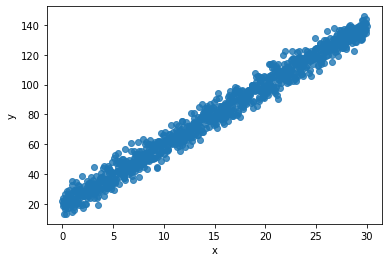

----------------------
Information about the model: 
      fun: 3034.2244803264343
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.54747313e-05,  1.13686838e-03, -4.09272618e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 120
      nit: 27
     njev: 30
   status: 0
  success: True
        x: array([14.65794158,  4.00341972,  5.02932129])
----------------------
const =  14.65794158410625 || Actual =  10
beta =  4.003419716902869 || Actual =  4
std_dev =  5.029321294870133 || Actual =  5
----------------------
Expected Output:  [15.30731061 34.52565218 39.46446684]
Predicted Output:  [23.6906826  27.69410231 31.69752203]


In [13]:
# create dummy observations
x = np.linspace(0, 30, 1000)

# create a set of normally distributed points to add variation to the ground-truth
e = np.random.normal(10, 5, 1000)

# generate dummy ground-truth for the sample points.
# In real world scenerio the func looks like: y = const + beta*x + var
# We put const=10, beta=4 and samples from e for adding the variance.
y = 10 + 4*x + e

# Put the data into the pandas data frame
df = pd.DataFrame({'x':x, 'y':y})

# Plot first 4 samples. Here x is observation and y is ground-truth
print (df.head())
print ("---------------------")

# visualize data distribution
sns.regplot(x='x', y='y', data = df)
plt.show()

print ("----------------------")

# Finding the negative log likelihood given a set of parameters. 
# We find three parameters, const, beta and std_dev
def MLE_Norm(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*x + std_dev

  LL = np.sum(scipy.stats.norm.logpdf(y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL

# Optimizing the MLE model. Minimizing the negative log likelihood.
mle_model = scipy.optimize.minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
print ("Information about the model: ")
print (mle_model)

print ("----------------------")
# Final parameters that are predicted.
print ("const = ", mle_model['x'][0], "|| Actual = ", 10)
print ("beta = ", mle_model['x'][1], "|| Actual = ", 4)
print ("std_dev = ", mle_model['x'][2], "|| Actual = ", 5)
print ("----------------------")

# Lets create two manual test data that can be used in the next experiment involving bayesian inference.
x_test = np.array([1, 2, 3])
e1 = np.random.normal(10, 5, 3)

# Ground-truth for test that we only use for checking
y_test = 10 + 4*x_test + e1

# Prediction using the MLE model that was fitted previously on the data
y_pred = mle_model['x'][0] + mle_model['x'][1]*x_test + np.array([mle_model['x'][2], mle_model['x'][2], mle_model['x'][2]])

print ("Expected Output: ", y_test)
print ("Predicted Output: ", y_pred)                                                             

### Bayesian Method of Parameter Estimation

The Bayes theorem states that,

$P(A|B) = \frac{P(B|A). P(A)}{p(B)}$

Here,  $A$ and $B$ are events, $P(A)$ is the probability of occurrence of $A$, and $P(A|B)$ is the probability of $A$ to occur given that event $B$ has already occurred. $P(B)$, the probability of event $B$ occurring cannot be $0$ since it has already occurred.

This concept is used for Bayesian parameter estimation. The simple formula states, 

$Posterior = \frac{Likelihood*Prior}{Normalization}$

Here, 

* Posterior: It is the probability of an event to occur; say, $A$, given that another event; say, $B$ has already occurred. i.e., $P(A | B)$.
* Prior: It is the probability of an event $A$ has occurred prior to another event. i.e., P(A)
* Likelihood: It is a likelihood function in which some parameter variable is marginalized.

In [14]:
# Creating the same dataset as done in the previous example
x = np.linspace(0, 30, 1000)

# create a set of normally distributed points to add variation to the ground-truth
e = np.random.normal(10, 5, 1000)

# generate dummy ground-truth for the sample points.
# In real world scenerio the func looks like: y = const + beta*x + var
# We put const=10, beta=4 and samples from e for adding the variance.
y = 10 + 4*x + e

# Reshaping because the BayesianRidge function accepts 2D shapes only!
x = np.reshape(x, [ x.shape[0], 1])

# Creating and training model
model = BayesianRidge()
model.fit(x, y)

# We take the same test data as taken during the MLE estimation.
# Please check the MLE estimation example to get the estimated output as well as the expected output.
X_test = np.array([1, 2, 3])
X_test = np.reshape(X_test, (X_test.shape[0], 1))

# Model making a prediction on test data
prediction = model.predict(X_test)

print ("Predicted output from Bayesian inference is: ", prediction)

Predicted output from Bayesian inference is:  [24.49518317 28.45377078 32.4123584 ]


As we can see, both the MLE predicted output and the Bayesian estimated output are similar. You can also check the expected outputs in the cell containing the MLE codes. Please use your own dummy datasets and test the results for both of the parameter estimation techniques.

### Ungraded Questions
1. Using a code, find the confidence interval of $95\%$ from a population of 10000 samples drawn from a normal distribution with $\mu=0$ and $\sigma=10$.
2. Using an appropriate test, check if the following data are from the same distribution or not. 



> Data 1:$\{3.097,  4.179,  6.985, -2.266,  8.076, 0.518, 9.861, -9.265, -5.353, 7.744 \}$.


> Data 2: $\{3.097,  4.179,  6.985, -2.266,  8.076,   0.518,
  9.861, -9.265, -5.353,   7.744, \}$


### Please answer the questions below to complete the experiment:




**Question:** Footballers playing in the Barclays Premier League are weighed and the measurements are recorded. Each teams first choice playing $11$ is considered for this excercise and is considered a sample. The sample mean has a mean of $\mu_\overline{X}$ which is calculated to be 80 KG. The standard deviation $\sigma_\overline{X}$ of the sample mean is calculated to be $9$ KG.

In [15]:
# @title Calculate the mean and standard deviation of the population. { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["", "Mean = 265.32 KG ; Standard Deviation = 9 KG","Mean = 80 KG ; Standard Deviation = 29.84 KG","Mean = 24.12 KG ; Standard Deviation = 9 KG"]

In [16]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [17]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [18]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [19]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [20]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [21]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please complete the setup first.
